In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right CINGULATE of subjects in UKB, HCP, CCD and CCD Controls after implementing a betaVAE with the latent space's size n=256


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/15-54-15/CCD/Reconstruction_error.csv")

In [3]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [4]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [5]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [6]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [7]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,ag080048,-0.199393,-1.363163,-0.920748,-0.611714,-0.110846,0.257253,-0.388904,-0.224065,-0.637069,...,-0.401025,0.469227,0.595411,0.265836,-0.062518,0.181825,-0.609347,-0.091306,-0.573023,-0.778200
1,bt080019,0.177843,0.529031,0.131211,0.189829,0.458579,0.156840,0.330770,0.288864,1.909292,...,-0.095483,-0.524494,-0.023923,-0.097915,-0.067111,0.146362,-0.736364,0.102147,-1.238553,-0.265793
2,ca090293,-0.114449,1.588976,-0.969339,0.100220,0.503265,-0.354201,0.329774,-0.094416,-1.653459,...,-1.016289,-0.870545,0.150398,-0.280455,-0.373929,-0.431767,0.361516,0.191787,-0.255872,0.807591
3,cd100556,0.210329,2.985967,-0.393119,-0.665123,0.176411,0.094182,-0.946409,0.587616,0.550533,...,0.083216,0.098085,0.293949,0.452836,-0.177026,-0.182146,1.131370,0.482642,-2.124506,-0.192536
4,cr070055,-0.009058,1.404875,-0.141055,-0.817491,0.830880,-0.314244,1.455495,1.172265,-0.296812,...,0.468367,-0.721334,0.209415,-0.257035,-0.198164,0.037290,0.386498,-0.325179,-2.423309,-1.399492
5,fb070174,0.066336,0.469179,-0.319213,-0.283288,0.216786,-0.169723,0.265336,-0.289768,-0.404255,...,0.230997,0.608971,0.263363,-0.522256,-0.259104,0.102094,-0.324461,-0.504843,1.249280,0.659107
6,gd070065,0.506490,-0.993930,0.355156,1.231320,-0.998232,-0.236111,1.213027,0.454760,-2.481778,...,0.190595,0.152078,0.261726,-0.378880,-0.418982,0.175137,0.777840,-0.168271,0.153656,-3.199042
7,lc110410,-0.126273,2.359440,-0.195528,-0.148396,-0.011978,-0.110015,-0.842280,-0.339887,0.466373,...,0.766078,0.576232,-0.057041,-0.610584,-0.382262,-0.353604,0.316007,-0.628392,-0.682283,-2.650344
8,md110095,0.269373,-1.738505,0.309373,0.658957,-0.306704,-0.033376,1.127597,-0.811295,-0.943205,...,0.704301,-0.051622,-0.078311,0.238549,0.078457,0.288127,-0.189568,0.017762,-0.793084,-0.859413
9,mm080047,0.412193,1.224582,1.709362,0.200656,1.246700,-0.314783,3.073125,-0.980046,-0.007690,...,1.724086,-0.313449,0.097451,0.066781,0.314400,0.340515,1.505339,-0.188660,-0.466614,-0.080634


In [8]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,716.416992
1,bt080019,1271.158569
2,ca090293,1173.629028
3,cd100556,1002.268799
4,cr070055,1546.089111
5,fb070174,1149.002075
6,gd070065,1919.080078
7,lc110410,1682.556396
8,md110095,743.988525
9,mm080047,1141.101807


In [9]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [10]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [11]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

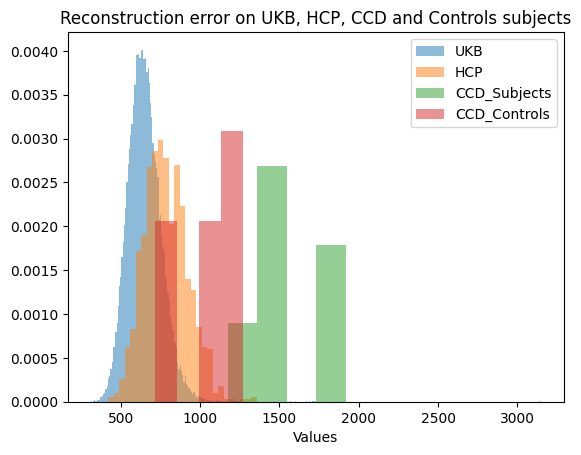

In [12]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [13]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]


In [14]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)



/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


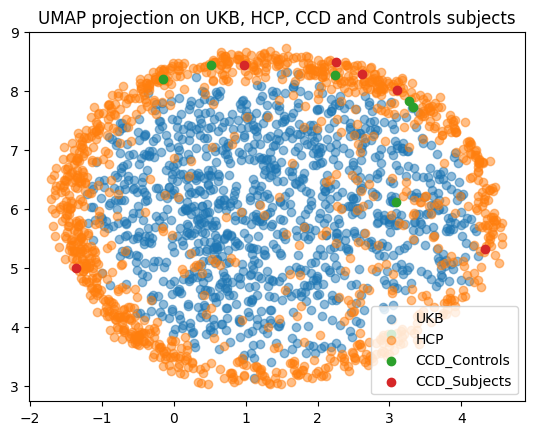

In [15]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [16]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [17]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,572.866211
1,UKB,729.746216
2,UKB,648.723999
3,UKB,695.958252
4,UKB,591.607544
...,...,...
42428,UKB,649.059692
42429,UKB,538.050781
42430,UKB,541.902222
42431,UKB,630.875977


In [18]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:4.432e-03 U_stat=1.564e+03
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:2.331e-03 U_stat=1.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:2.218e-14 U_stat=6.000e+00


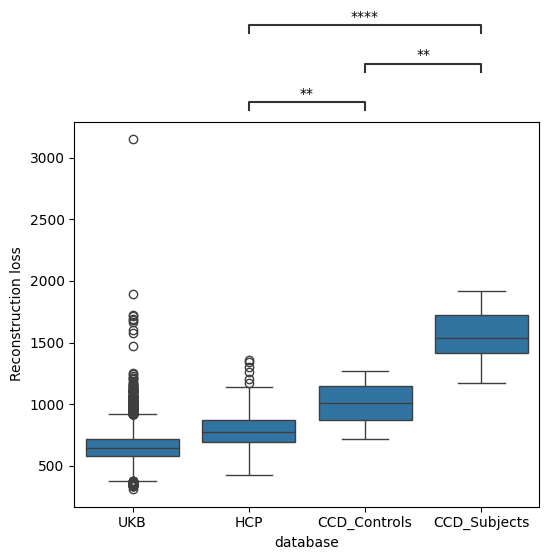

In [19]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
